In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

import matplotlib.colors as colors
import matplotlib
# Pick font here
# matplotlib.rcParams['font.serif'] = "Times"
# Then set this font globally
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['axes.linewidth'] = 2

matplotlib.rcParams['xtick.major.size'] = 7.5
matplotlib.rcParams['xtick.major.width'] = 1.6
matplotlib.rcParams['xtick.minor.size'] = 4.0
matplotlib.rcParams['xtick.minor.width'] = 1.2

matplotlib.rcParams['ytick.major.size'] = 7.5
matplotlib.rcParams['ytick.major.width'] = 1.6
matplotlib.rcParams['ytick.minor.size'] = 4.0
matplotlib.rcParams['ytick.minor.width'] = 1.2

/global/homes/b/biekerta/.conda/envs/LZ_Python_Kernel/lib/python3.8/site-packages/uproot/reading.py:186: FutureWarning: XRootD 5.1.1 is not fully supported; either upgrade to 5.2.0+ or set

    open.defaults["xrootd_handler"] = uproot.MultithreadedXRootDSource

  warnings.warn(message, FutureWarning)


In [2]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

file.keys()

['MS_LogS2vS1;S1c [phd];Log(S2c [phd]);1',
 'MS_ROI_FV_LogS2vS1;S1c [phd];Log(S2c [phd]);1',
 'MS_ROI_FV_S2;S2_raw [phd];1',
 'MS_ROI_FV_XvY;x [cm];y [cm];1',
 'MS_ROI_FV_ZvR2;R^2 [cm^2];z [cm];1',
 'MS_ROI_LogS2vS1;S1c [phd];Log(S2c [phd]);1',
 'MS_ROI_S2;S2_raw [phd];1',
 'MS_ROI_XvY;x [cm];y [cm];1',
 'MS_ROI_ZvR2;R^2 [cm^2];z [cm];1',
 'MS_S2;S2_raw [phd];1',
 'MS_XvY;x [cm];y [cm];1',
 'MS_ZvR2;R^2 [cm^2];z [cm];1',
 'Num_S1s;Num;1',
 'Num_S2s;Num;1',
 'OD_largest_pulse_area; OD largest pulse area [phd];1',
 'Other_LogS2vS1;S1_raw [phd];Log(S2_raw [phd]);1',
 'Other_ROI_FV_LogS2vS1;S1_raw [phd];Log(S2_raw [phd]);1',
 'Other_ROI_FV_S2;S2_raw [phd];1',
 'Other_ROI_FV_XvY;x [cm];y [cm];1',
 'Other_ROI_FV_ZvR2;R^2 [cm^2];z [cm];1',
 'Other_ROI_LogS2vS1;S1_raw [phd];Log(S2_raw [phd]);1',
 'Other_ROI_S2;S2_raw [phd];1',
 'Other_ROI_XvY;x [cm];y [cm];1',
 'Other_ROI_ZvR2;R^2 [cm^2];z [cm];1',
 'Other_S2;S2_raw [phd];1',
 'Other_XvY;x [cm];y [cm];1',
 'Other_ZvR2;R^2 [cm^2];z [cm];1',
 'P

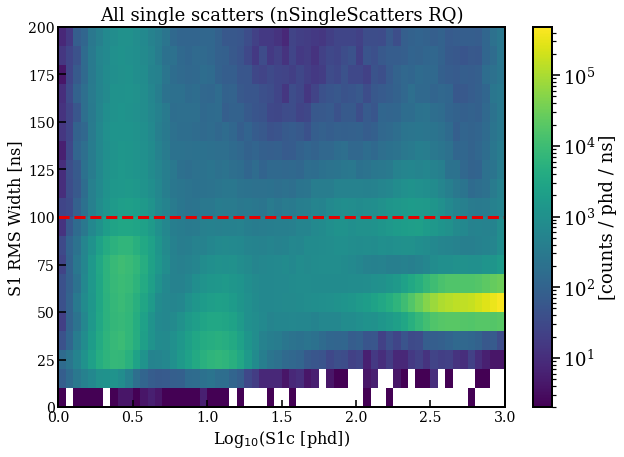

In [3]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

hist, x_bin_edges, y_bin_edges = file['SS_S1rmsWvLogS1;Log(S1c [phd]);S1 RMS Width [ns];1'].to_numpy()

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel() / (x_binsize * y_binsize)
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

s1_rms_w_cut = 100

ax.plot([0, 5], [s1_rms_w_cut, s1_rms_w_cut], color='xkcd:red', linestyle='--', linewidth=3)

ax.set_ylim([0, 200])
ax.set_xlim([0, 3])

ax.set_xlabel(r'Log$_{10}$(S1c [phd])', fontsize=16)
ax.set_ylabel(r'S1 RMS Width [ns]', fontsize=16)
ax.set_title('All single scatters (nSingleScatters RQ)', fontsize=18)

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'[counts / phd / ns]', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/S1rmsWvLogS1.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/S1rmsWvLogS1.png", bbox_inches='tight')

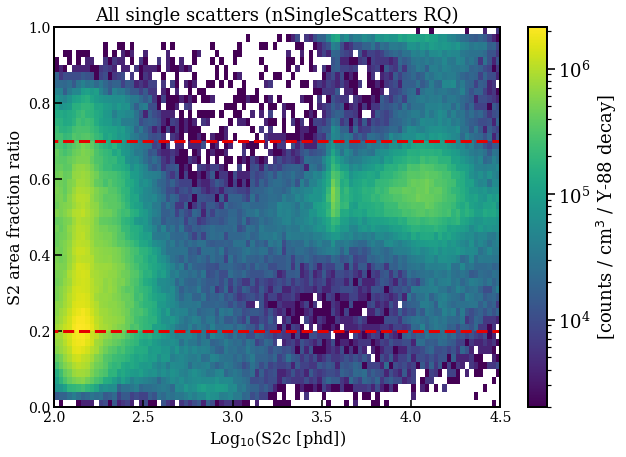

In [4]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

hist, x_bin_edges, y_bin_edges = file['SS_S2PFvLogS2;Log(S2c [phd]);S2 area_fraction_time_ratio;1'].to_numpy()

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel() / (x_binsize * y_binsize)
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

s2_afr_cut_lower = 0.2
s2_afr_cut_upper = 0.7

ax.plot([0, 5.5], [s2_afr_cut_lower, s2_afr_cut_lower], color='xkcd:red', linestyle='--', linewidth=3)
ax.plot([0, 5.5], [s2_afr_cut_upper, s2_afr_cut_upper], color='xkcd:red', linestyle='--', linewidth=3)

ax.set_xlabel(r'Log$_{10}$(S2c [phd])', fontsize=16)
ax.set_ylabel(r'S2 area fraction ratio', fontsize=16)
ax.set_title('All single scatters (nSingleScatters RQ)', fontsize=18)

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'[counts / cm$^3$ / Y-88 decay]', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/S2AFRvLogS2.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/S2AFRvLogS2.png", bbox_inches='tight')

5087.0


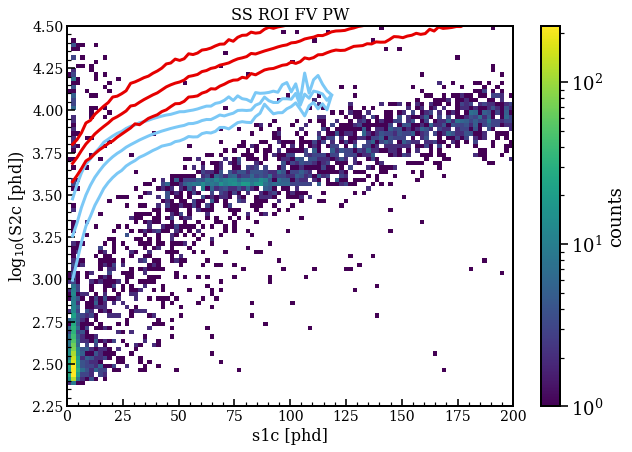

In [5]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

band_file_nr = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/AmLi_Band_logS2_skew_band.txt'
band_values_nr = np.loadtxt(band_file_nr, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

band_file_er = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/ERweighted_flatBand_logS2_skew_band.txt'
band_values_er = np.loadtxt(band_file_er, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

hist, x_bin_edges, y_bin_edges = file['SS_ROI_FV_PW_LogS2vS1;S1c [phd];Log(S2c [phd]);1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

ax.plot(band_values_nr[:,0], band_values_nr[:,1], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]-band_values_nr[:,2], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]+band_values_nr[:,3], color='xkcd:lightblue', linestyle='-', linewidth=3)

ax.plot(band_values_er[:,0], band_values_er[:,1], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]-band_values_er[:,2], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]+band_values_er[:,3], color='xkcd:red', linestyle='-', linewidth=3)

ax.set_title('SS ROI FV PW', fontsize=16)
ax.set_xlabel(r's1c [phd]', fontsize=16)
ax.set_ylabel('log$_{10}$(S2c [phd])', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

#ax.set_xlim([0, 30])
ax.set_ylim([2.25, 4.5])

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/SS_ROI_FV_PW_LogS2vS1.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/SS_ROI_FV_PW_LogS2vS1.png", bbox_inches='tight')

475.0


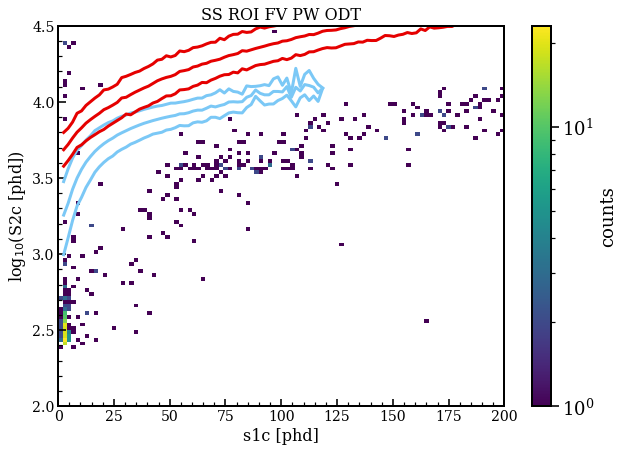

In [6]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

band_file_nr = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/AmLi_Band_logS2_skew_band.txt'
band_values_nr = np.loadtxt(band_file_nr, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

band_file_er = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/ERweighted_flatBand_logS2_skew_band.txt'
band_values_er = np.loadtxt(band_file_er, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

hist, x_bin_edges, y_bin_edges = file['SS_ROI_FV_PW_ODT_LogS2vS1;S1c [phd];Log(S2c [phd]);1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

ax.plot(band_values_nr[:,0], band_values_nr[:,1], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]-band_values_nr[:,2], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]+band_values_nr[:,3], color='xkcd:lightblue', linestyle='-', linewidth=3)

ax.plot(band_values_er[:,0], band_values_er[:,1], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]-band_values_er[:,2], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]+band_values_er[:,3], color='xkcd:red', linestyle='-', linewidth=3)

ax.set_title('SS ROI FV PW ODT', fontsize=16)
ax.set_xlabel(r's1c [phd]', fontsize=16)
ax.set_ylabel('log$_{10}$(S2c [phd])', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

#ax.set_xlim([0, 30])
#ax.set_ylim([2.25, 4.5])

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/SS_ROI_FV_PW_ODT_LogS2vS1.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/SS_ROI_FV_PW_ODT_LogS2vS1.png", bbox_inches='tight')

21726.0


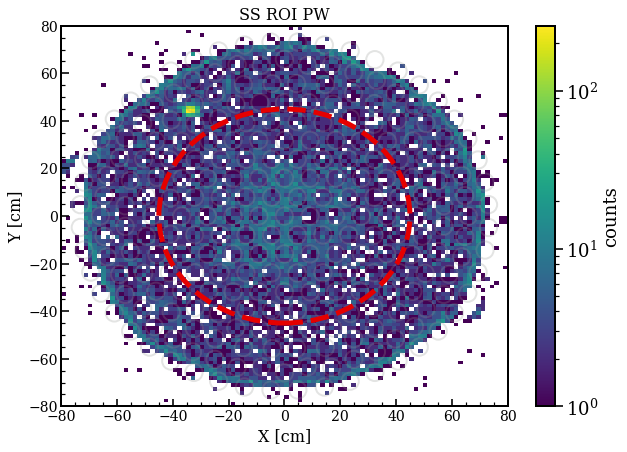

In [7]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

hist, x_bin_edges, y_bin_edges = file['SS_ROI_PW_XvY;x [cm];y [cm];1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

fid_r_max = 45
ax.add_patch(plt.Circle((0,0), fid_r_max, linewidth=5, fill=False, color='xkcd:red', linestyle='--', label="fiducial volume"))

pmt_positions = np.loadtxt("/cvmfs/lz.opensciencegrid.org/LZap/ConditionsDataModel/PMTpositions-LZ-26Feb20.txt", skiprows=1)
top_pmts = (pmt_positions[:,3] == 1.53900e+03)
ax.scatter(pmt_positions[top_pmts][:,1]/10, pmt_positions[top_pmts][:,2]/10, s=300, facecolor='none', color='xkcd:grey', alpha=0.25, linewidth=2)

ax.set_title('SS ROI PW', fontsize=16)
ax.set_xlabel(r'X [cm]', fontsize=16)
ax.set_ylabel('Y [cm]', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

#ax.scatter(-31.691898, 43.948486, s=100, color='xkcd:pink')

plt.show()

fig.savefig("alpaca_plots/SS_ROI_PW_XvY.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/SS_ROI_PW_XvY.png", bbox_inches='tight')

21294.0


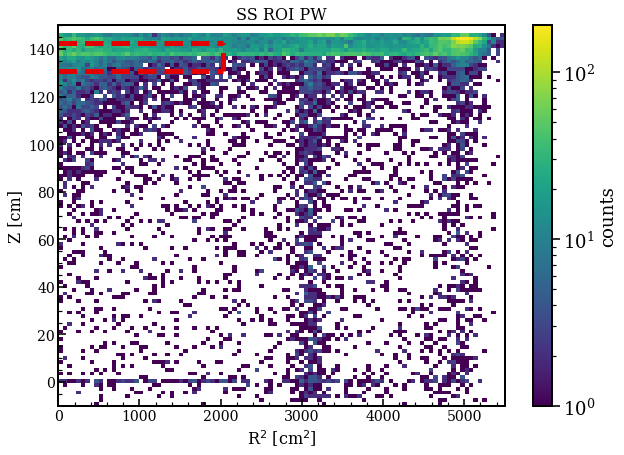

In [8]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

hist, x_bin_edges, y_bin_edges = file['SS_ROI_PW_ZvR2;R^2 [cm^2];z [cm];1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

fid_z_min = 130.6
fid_z_max = 142.6
fid_r_max = 45

ax.plot([0, fid_r_max**2], [fid_z_min, fid_z_min], linewidth=5, color='xkcd:red', linestyle='--', label="expanded fiducial volume")
ax.plot([0, fid_r_max**2], [fid_z_max, fid_z_max], linewidth=5, color='xkcd:red', linestyle='--')
ax.plot([fid_r_max**2, fid_r_max**2], [fid_z_min, fid_z_max], linewidth=5, color='xkcd:red', linestyle='--')

ax.set_title('SS ROI PW', fontsize=16)
ax.set_xlabel(r'R$^2$ [cm$^2$]', fontsize=16)
ax.set_ylabel('Z [cm]', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/SS_ROI_PW_ZvR2.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/SS_ROI_PW_ZvR2.png", bbox_inches='tight')

20750.0


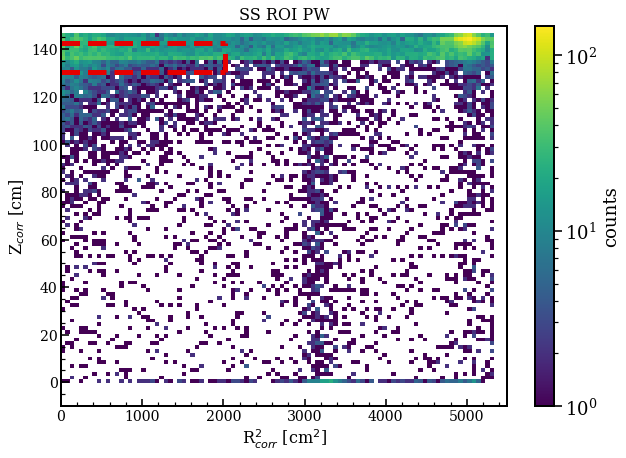

In [9]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

hist, x_bin_edges, y_bin_edges = file['SS_ROI_PW_Z_corrvR2_corr;R^2 [cm^2];z [cm];1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

fid_z_min = 130.6
fid_z_max = 142.6
fid_r_max = 45

ax.plot([0, fid_r_max**2], [fid_z_min, fid_z_min], linewidth=5, color='xkcd:red', linestyle='--', label="expanded fiducial volume")
ax.plot([0, fid_r_max**2], [fid_z_max, fid_z_max], linewidth=5, color='xkcd:red', linestyle='--')
ax.plot([fid_r_max**2, fid_r_max**2], [fid_z_min, fid_z_max], linewidth=5, color='xkcd:red', linestyle='--')

ax.set_title('SS ROI PW', fontsize=16)
ax.set_xlabel(r'R$_{corr}^2$ [cm$^2$]', fontsize=16)
ax.set_ylabel('Z$_{corr}$ [cm]', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/SS_ROI_PW_ZvR2.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/SS_ROI_PW_ZvR2.png", bbox_inches='tight')

38608.0


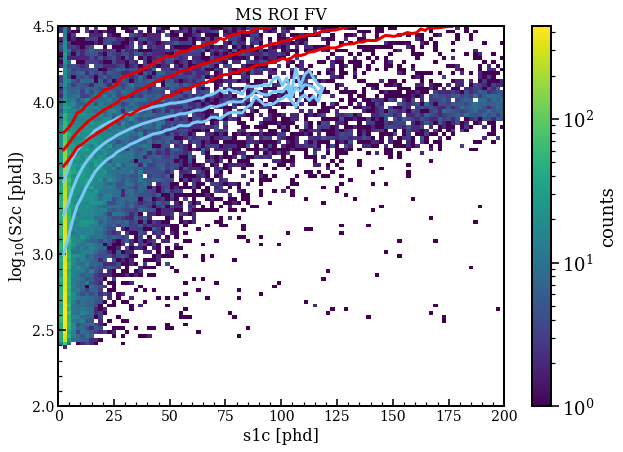

In [10]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

band_file_nr = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/AmLi_Band_logS2_skew_band.txt'
band_values_nr = np.loadtxt(band_file_nr, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

band_file_er = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/ERweighted_flatBand_logS2_skew_band.txt'
band_values_er = np.loadtxt(band_file_er, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

hist, x_bin_edges, y_bin_edges = file['MS_ROI_FV_LogS2vS1;S1c [phd];Log(S2c [phd]);1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

ax.plot(band_values_nr[:,0], band_values_nr[:,1], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]-band_values_nr[:,2], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]+band_values_nr[:,3], color='xkcd:lightblue', linestyle='-', linewidth=3)

ax.plot(band_values_er[:,0], band_values_er[:,1], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]-band_values_er[:,2], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]+band_values_er[:,3], color='xkcd:red', linestyle='-', linewidth=3)

ax.set_title('MS ROI FV', fontsize=16)
ax.set_xlabel(r's1c [phd]', fontsize=16)
ax.set_ylabel('log$_{10}$(S2c [phd])', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

#ax.set_xlim([0, 30])
#ax.set_ylim([2.25, 4.5])

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/MS_ROI_FV_LogS2vS1.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/MS_ROI_FV_LogS2vS1.png", bbox_inches='tight')

126878.0


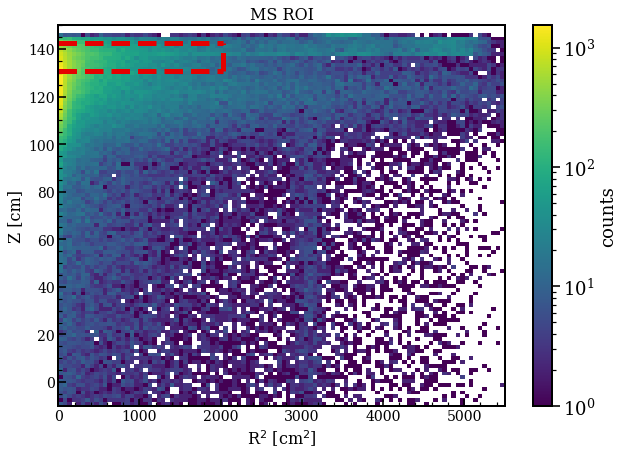

In [11]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

hist, x_bin_edges, y_bin_edges = file['MS_ROI_ZvR2;R^2 [cm^2];z [cm];1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

fid_z_min = 130.6
fid_z_max = 142.6
fid_r_max = 45

ax.plot([0, fid_r_max**2], [fid_z_min, fid_z_min], linewidth=5, color='xkcd:red', linestyle='--', label="expanded fiducial volume")
ax.plot([0, fid_r_max**2], [fid_z_max, fid_z_max], linewidth=5, color='xkcd:red', linestyle='--')
ax.plot([fid_r_max**2, fid_r_max**2], [fid_z_min, fid_z_max], linewidth=5, color='xkcd:red', linestyle='--')

ax.set_title('MS ROI', fontsize=16)
ax.set_xlabel(r'R$^2$ [cm$^2$]', fontsize=16)
ax.set_ylabel('Z [cm]', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/MS_ROI_ZvR2.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/MS_ROI_ZvR2.png", bbox_inches='tight')

624547.0


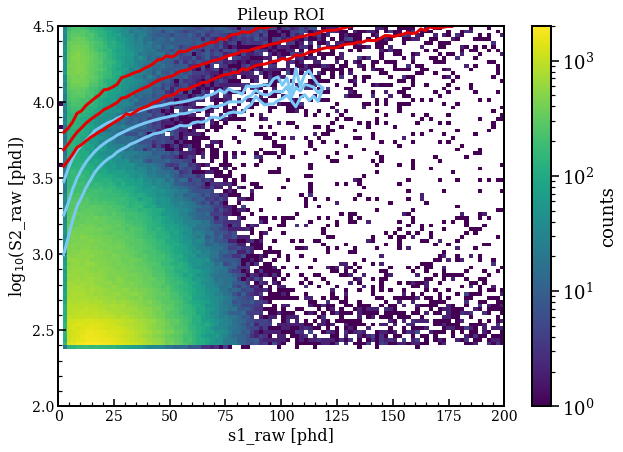

In [12]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

band_file_nr = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/AmLi_Band_logS2_skew_band.txt'
band_values_nr = np.loadtxt(band_file_nr, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

band_file_er = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/ERweighted_flatBand_logS2_skew_band.txt'
band_values_er = np.loadtxt(band_file_er, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

hist, x_bin_edges, y_bin_edges = file['Pileup_ROI_LogS2vS1;S1_raw [phd];Log(S2_raw [phd]);1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

ax.plot(band_values_nr[:,0], band_values_nr[:,1], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]-band_values_nr[:,2], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]+band_values_nr[:,3], color='xkcd:lightblue', linestyle='-', linewidth=3)

ax.plot(band_values_er[:,0], band_values_er[:,1], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]-band_values_er[:,2], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]+band_values_er[:,3], color='xkcd:red', linestyle='-', linewidth=3)

ax.set_title('Pileup ROI', fontsize=16)
ax.set_xlabel(r's1_raw [phd]', fontsize=16)
ax.set_ylabel('log$_{10}$(S2_raw [phd])', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

#ax.set_xlim([0, 30])
#ax.set_ylim([2.25, 4.5])

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/Pileup_ROI_LogS2vS1.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/Pileup_ROI_LogS2vS1.png", bbox_inches='tight')

329034.0


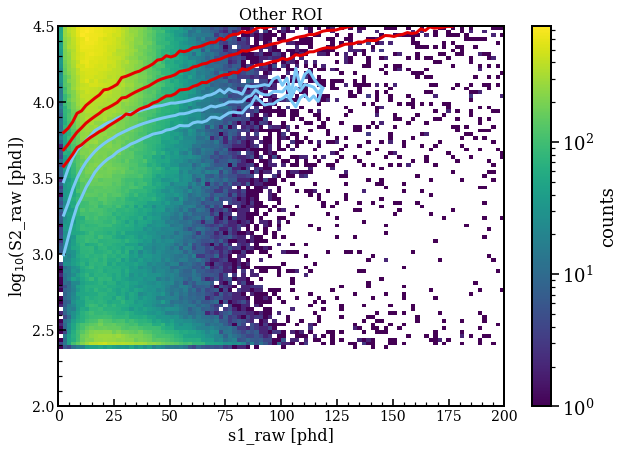

In [13]:
filename = '/global/homes/b/biekerta/photoneutron_analysis/ALPACA/run/CalibYBe/CalibYBeAnalysis.root'
file = uproot.open(filename)

band_file_nr = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/AmLi_Band_logS2_skew_band.txt'
band_values_nr = np.loadtxt(band_file_nr, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

band_file_er = '/global/cfs/cdirs/lz/users/grischbi/CommissioningBands/v1/ERweighted_flatBand_logS2_skew_band.txt'
band_values_er = np.loadtxt(band_file_er, skiprows=1, usecols=[0,1,2,3], converters={2: lambda s: s.split(b'[')[1], 3: lambda s: s.split(b']')[0]})

hist, x_bin_edges, y_bin_edges = file['Other_ROI_LogS2vS1;S1_raw [phd];Log(S2_raw [phd]);1'].to_numpy()
print(np.sum(hist))

fig, ax = plt.subplots(1, 1, figsize=(10,7))

x_bin_centers = (x_bin_edges[1:] + x_bin_edges[:-1])/2
y_bin_centers = (y_bin_edges[1:] + y_bin_edges[:-1])/2

x_binsize = x_bin_centers[1] - x_bin_centers[0]
y_binsize = y_bin_centers[1] - y_bin_centers[0]

xv, yv = np.meshgrid(x_bin_centers, y_bin_centers)
x = xv.ravel()
y = yv.ravel()
z = hist.T.ravel()
h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(x_bin_edges, y_bin_edges), norm=colors.LogNorm())

ax.plot(band_values_nr[:,0], band_values_nr[:,1], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]-band_values_nr[:,2], color='xkcd:lightblue', linestyle='-', linewidth=3)
ax.plot(band_values_nr[:,0], band_values_nr[:,1]+band_values_nr[:,3], color='xkcd:lightblue', linestyle='-', linewidth=3)

ax.plot(band_values_er[:,0], band_values_er[:,1], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]-band_values_er[:,2], color='xkcd:red', linestyle='-', linewidth=3)
ax.plot(band_values_er[:,0], band_values_er[:,1]+band_values_er[:,3], color='xkcd:red', linestyle='-', linewidth=3)

ax.set_title('Other ROI', fontsize=16)
ax.set_xlabel(r's1_raw [phd]', fontsize=16)
ax.set_ylabel('log$_{10}$(S2_raw [phd])', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

#ax.set_xlim([0, 30])
#ax.set_ylim([2.25, 4.5])

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  

cb = ax.figure.colorbar(im, ax=ax)
cb.set_label(r'counts', fontsize=18)
cb.ax.tick_params(labelsize=18)

plt.show()

fig.savefig("alpaca_plots/Other_ROI_LogS2vS1.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/Other_ROI_LogS2vS1.png", bbox_inches='tight')

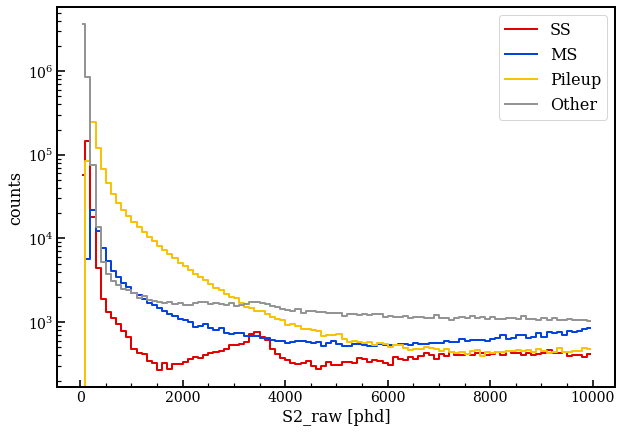

In [14]:
s2_hist_SS, bin_edges = file['SS_S2;S2_raw [phd];1'].to_numpy()
s2_hist_MS, _ = file['MS_S2;S2_raw [phd];1'].to_numpy()
s2_hist_Pileup, _ = file['Pileup_S2;S2_raw [phd];1'].to_numpy()
s2_hist_Other, _ = file['Other_S2;S2_raw [phd];1'].to_numpy()

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
binsize = bin_centers[1] - bin_centers[0]

fig, ax = plt.subplots(1, 1, figsize=(10,7))
    
ax.plot(bin_centers, s2_hist_SS, drawstyle='steps-mid', linewidth=2, color='xkcd:red', label='SS')
ax.plot(bin_centers, s2_hist_MS, drawstyle='steps-mid', linewidth=2, color='xkcd:blue', label='MS')
ax.plot(bin_centers, s2_hist_Pileup, drawstyle='steps-mid', linewidth=2, color='xkcd:goldenrod', label='Pileup')
ax.plot(bin_centers, s2_hist_Other, drawstyle='steps-mid', linewidth=2, color='xkcd:grey', label='Other')

#ax.set_xlim([0, 10000])
#ax.set_ylim([5e-4, 1e-1])

ax.semilogy()

ax.set_xlabel(r'S2_raw [phd]', fontsize=16)
ax.set_ylabel('counts', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)                                   
ax.minorticks_on()

ax.legend(fontsize=16)

fig.savefig("alpaca_plots/Branch_S2raw_comparison.pdf", bbox_inches='tight')
fig.savefig("alpaca_plots/Branch_S2raw_comparison.png", bbox_inches='tight')

plt.show()